<a href="https://colab.research.google.com/github/swamyappu/Assignment-6/blob/main/Assignment_6_Case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2: Use Image Classification on the hand written digits data set (mnist)


In [15]:
#@title In class program

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 17s 22ms/step - loss: 0.2881 - accuracy: 0.9127 - val_loss: 0.1125 - val_accuracy: 0.9658
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1008 - accuracy: 0.9688 - val_loss: 0.0848 - val_accuracy: 0.9724
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.0740 - val_accuracy: 0.9771
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0883 - val_accuracy: 0.9717
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 6/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0650 - val_accuracy: 0.9816
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0731 - val_ac

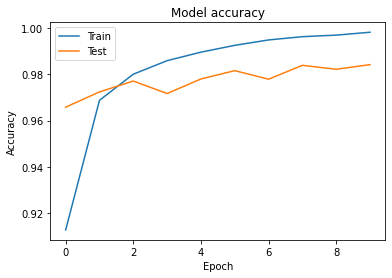

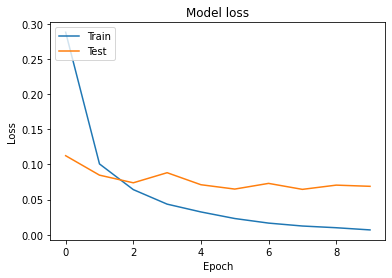

In [16]:
#@title Plot the loss and accuracy for both training data and validation data using the history object in the source code.
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

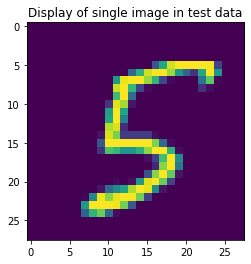

1/1 [==============================] - 0s 52ms/step

 The predicted single image in the test data is:  [[1.8109153e-18 1.8839754e-16 6.2917244e-19 4.0001384e-09 1.1240149e-19
  1.0000000e+00 1.3262069e-13 1.2345683e-20 7.5352229e-15 2.0021901e-13]]


In [17]:
#@title Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

# plot the single image in the test data
plt.imshow(test_images[23].reshape(28,28))
plt.title('Display of single image in test data')
plt.show()

# get the prediction of the model on the above image in the test data
test_img_pred = model.predict(test_data[[23], :])          
print("\n The predicted single image in the test data is: ", test_img_pred)


In [18]:
#@title change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
model_1 = Sequential()
model_1.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_1.add(Dense(550, activation='tanh'))
model_1.add(Dense(600, activation='tanh'))
model_1.add(Dense(612, activation='tanh'))
model_1.add(Dense(10, activation='sigmoid'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=15, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model_1.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

Epoch 1/15
235/235 [==============================] - 10s 38ms/step - loss: 0.4867 - accuracy: 0.8577 - val_loss: 0.3569 - val_accuracy: 0.8976
Epoch 2/15
235/235 [==============================] - 8s 35ms/step - loss: 0.1618 - accuracy: 0.9508 - val_loss: 0.2481 - val_accuracy: 0.9278
Epoch 3/15
235/235 [==============================] - 9s 37ms/step - loss: 0.1017 - accuracy: 0.9692 - val_loss: 0.1313 - val_accuracy: 0.9574
Epoch 4/15
235/235 [==============================] - 9s 38ms/step - loss: 0.0713 - accuracy: 0.9771 - val_loss: 0.1207 - val_accuracy: 0.9627
Epoch 5/15
235/235 [==============================] - 8s 35ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0883 - val_accuracy: 0.9738
Epoch 6/15
235/235 [==============================] - 8s 35ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0880 - val_accuracy: 0.9744
Epoch 7/15
235/235 [==============================] - 9s 36ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.0783 - val_accuracy: 0.976

In [19]:
#@title Run the same code without scaling the images and check the performance
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model_2 = Sequential()
model_2.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model_2.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 5.3510 - accuracy: 0.8734 - val_loss: 0.8519 - val_accuracy: 0.9204
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.4108 - accuracy: 0.9447 - val_loss: 0.4409 - val_accuracy: 0.9276
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2355 - accuracy: 0.9588 - val_loss: 0.2843 - val_accuracy: 0.9540
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1887 - accuracy: 0.9664 - val_loss: 0.3692 - val_accuracy: 0.9419
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1591 - accuracy: 0.9726 - val_loss: 0.3398 - val_accuracy: 0.9609
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1461 - accuracy: 0.9765 - val_loss: 0.2864 - val_accuracy: 0.9629
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1348 - accuracy: 0.9789 - val_loss: 0.4527 - val_acc